In [13]:
from fairPCA import StreamingFairBlockPCA, sin, grassmanian_distance
import matplotlib.pyplot as plt
import jax.numpy as np
from jax import random

Algo = StreamingFairBlockPCA(
    data_dim=100,
    probability=0.2,
    nullity=0,  # nullity of Sigma_gap
    seed=0,
    eps=0.1,
    mu_scale=0.5,
    max_cov_eig0=2,
    max_cov_eig1=2.5
)

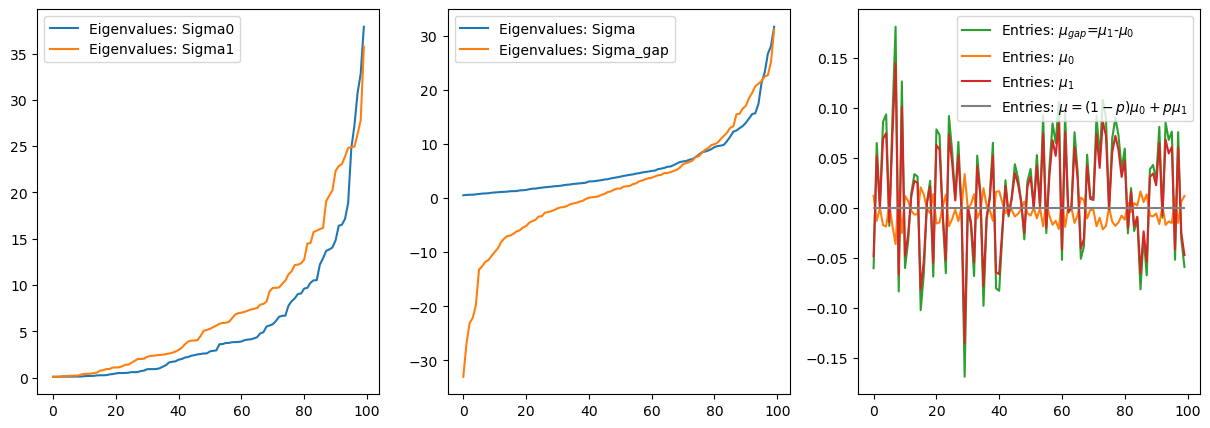

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

w0, _ = np.linalg.eigh(Algo.Sigma0)
w1, _ = np.linalg.eigh(Algo.Sigma1)
w, _ = np.linalg.eigh(Algo.Sigma)
wg, _ = np.linalg.eigh(Algo.Sigma_gap)

ax[0].plot(w0, label='Eigenvalues: Sigma0')
ax[0].plot(w1, label='Eigenvalues: Sigma1')
ax[0].legend()
ax[1].plot(w, label='Eigenvalues: Sigma')
ax[1].plot(wg,label='Eigenvalues: Sigma_gap')
ax[1].legend()
ax[2].plot(Algo.mu_gap, c='tab:green', label='Entries: $\mu_{gap}$=$\mu_1$-$\mu_0$')
ax[2].plot(Algo.mu0, c='tab:orange', label='Entries: $\mu_0$')
ax[2].plot(Algo.mu1, c='tab:red', label='Entries: $\mu_1$')
ax[2].plot(Algo.mu, c='gray', label='Entries: $\mu=(1-p)\mu_0 + p\mu_1$')
ax[2].legend()

In [15]:
unfair_pc_score = [(np.linalg.norm(Algo.eigvec_Sigma[:,-i-1] @ Algo.eigvec_Sigma_gap_sq[:,-1:]), i) for i in range(100)]
max(unfair_pc_score, key=lambda x: x[0])

(Array(0.97385764, dtype=float32), 0)

## Offline Training

  0%|          | 0/200 [00:00<?, ?it/s]

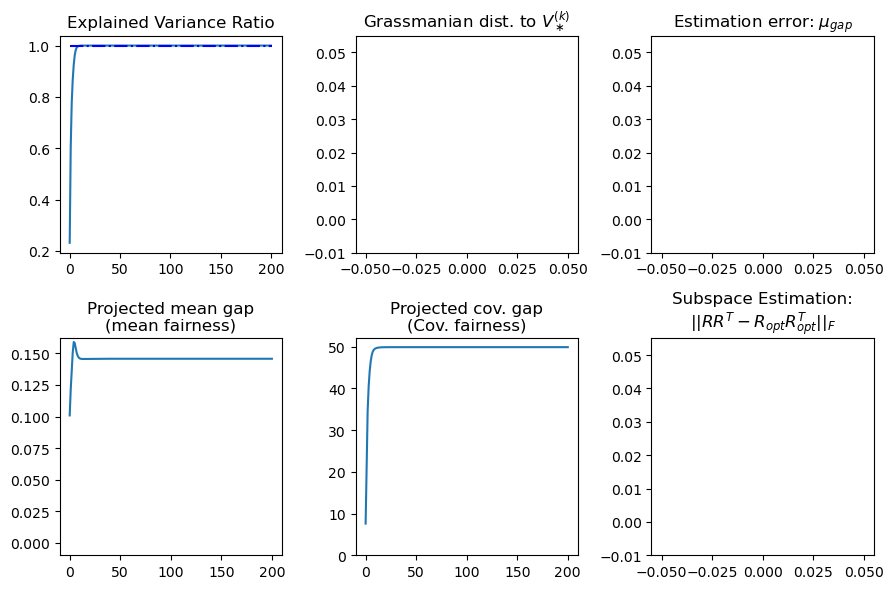

In [16]:
n_iter = 200
V = Algo.offline_train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    lr=1,
    mode='pm',
    constraint='vanilla',
    seed=0,
    tol=0,
    #lr_scheduler=lambda t: 0.99**(t-1)
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); 
# fig

  0%|          | 0/200 [00:00<?, ?it/s]

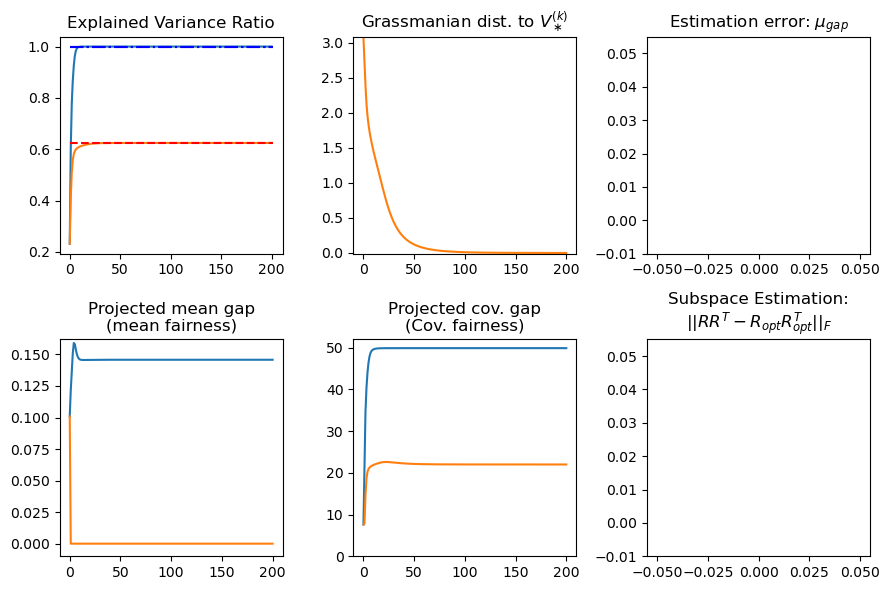

In [17]:
V = Algo.offline_train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    lr=1,
    mode='pm',
    constraint='all',
    seed=0,
    tol=0,
    #lr_scheduler=lambda t: 0.99**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None); 
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig

  0%|          | 0/200 [00:00<?, ?it/s]

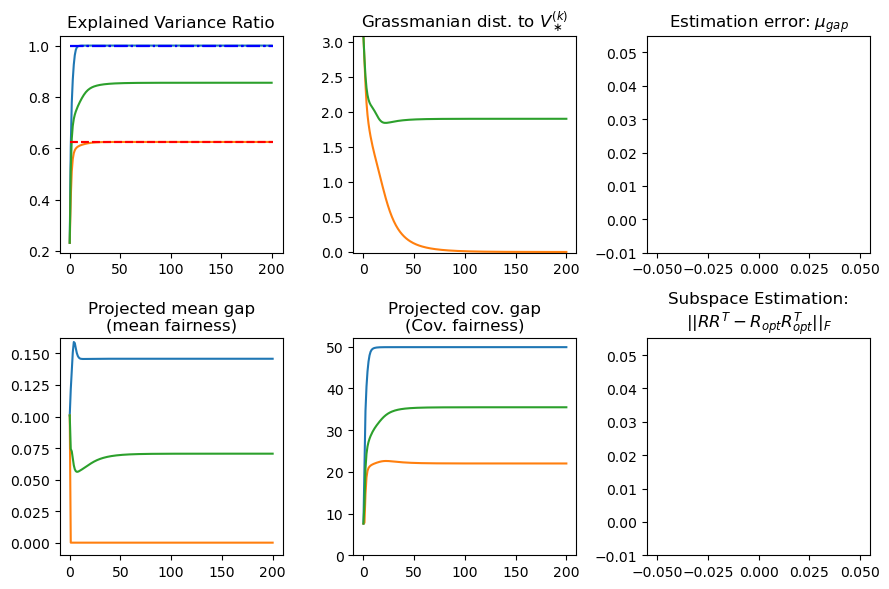

In [18]:
V = Algo.offline_train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    lr=1,
    mode='pm',
    constraint='all',
    seed=0,
    tol=0,
    #lr_scheduler=lambda t: 0.99**(t-1)
    fairness_tradeoff=0.3  # values in [0, 1]
)
# fig, axes = Algo.plot_buffer(save=None); 
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig

## Online - Fair PCA

  0%|          | 0/50 [00:00<?, ?it/s]

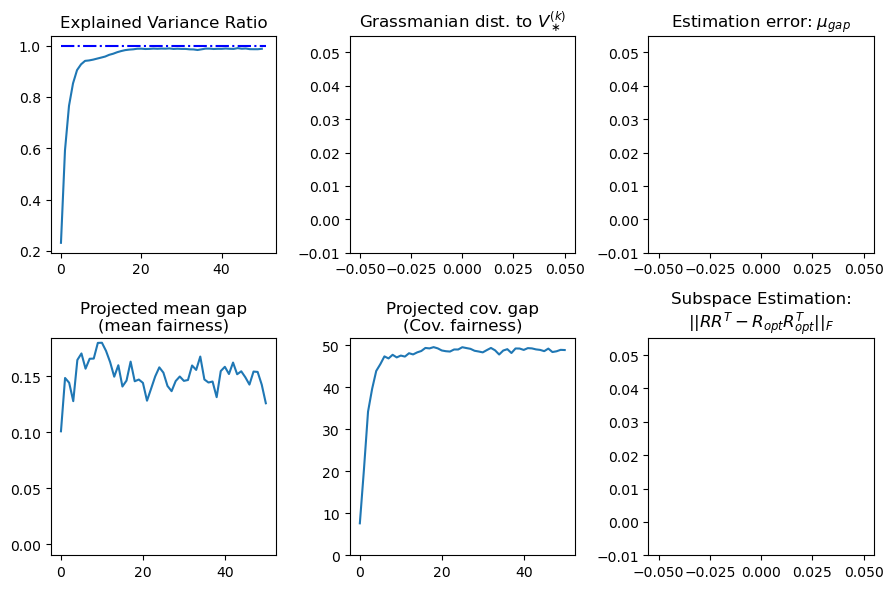

In [19]:
n_iter = 50
V = Algo.train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=None,
    batch_size_pca=1000,
    constraint='vanilla', # unfair
    subspace_optimization=None,
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    # lr_scheduler=lambda t: 0.998**(t-1)
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); 
# fig

  0%|          | 0/50 [00:00<?, ?it/s]

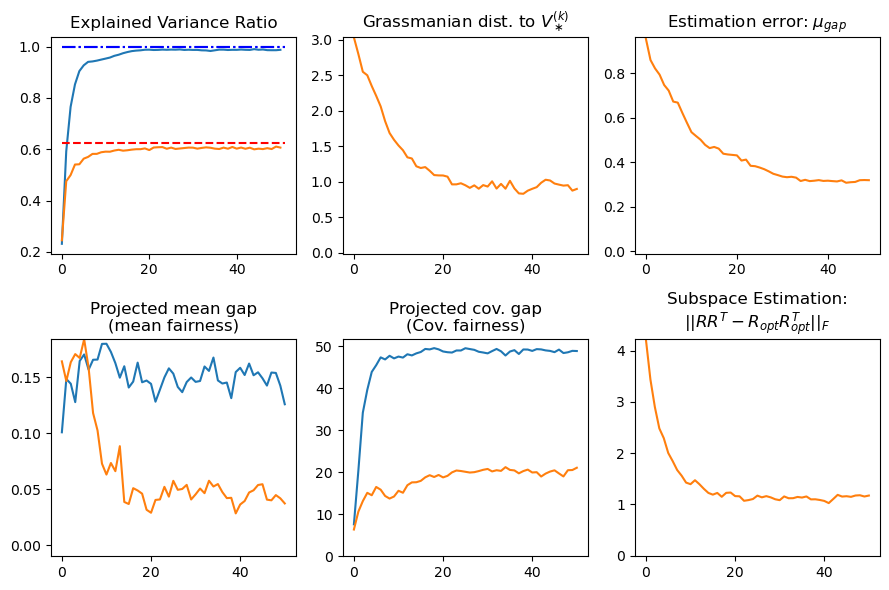

In [20]:
n_iter = 50
V = Algo.train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=500,
    batch_size_pca=500,
    constraint='all',
    subspace_optimization='npm',
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    fairness_tradeoff=1
    # lr_scheduler=lambda t: 0.998**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig

  0%|          | 0/50 [00:00<?, ?it/s]

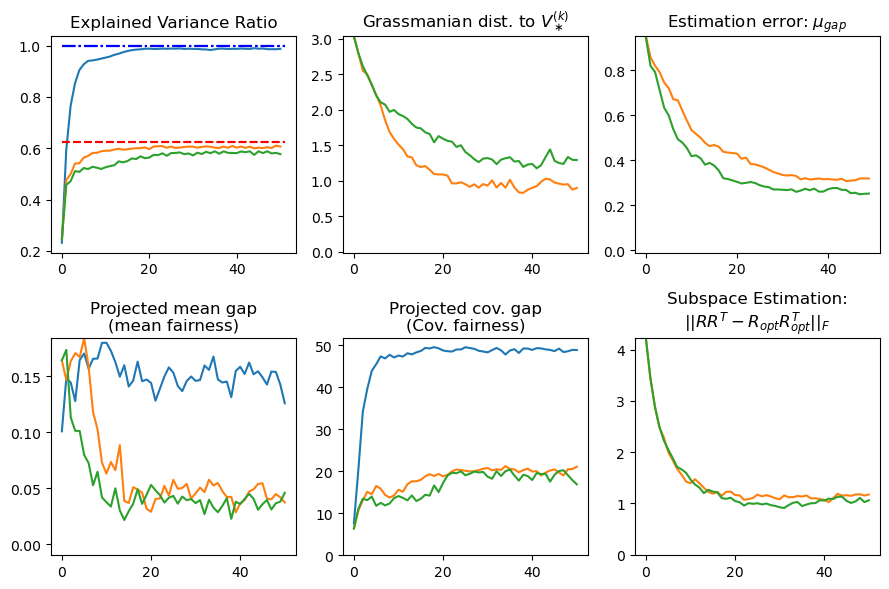

In [21]:
n_iter = 50
V = Algo.train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=750,
    batch_size_pca=250,
    constraint='all',
    subspace_optimization='npm',
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    fairness_tradeoff=1
    # lr_scheduler=lambda t: 0.998**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig

  0%|          | 0/50 [00:00<?, ?it/s]

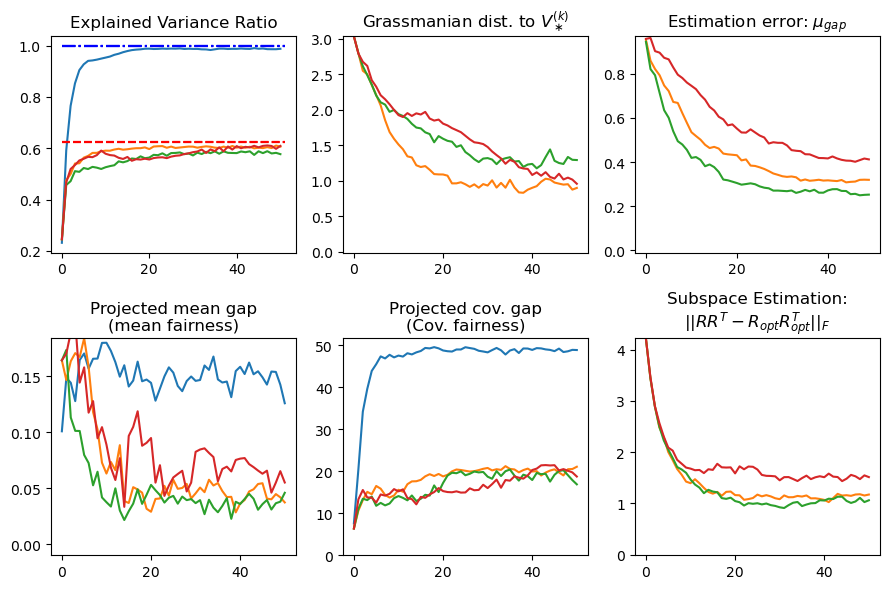

In [22]:
n_iter = 50
V = Algo.train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=250,
    batch_size_pca=750,
    constraint='all',
    subspace_optimization='npm',
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    fairness_tradeoff=1
    # lr_scheduler=lambda t: 0.998**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig

  0%|          | 0/50 [00:00<?, ?it/s]

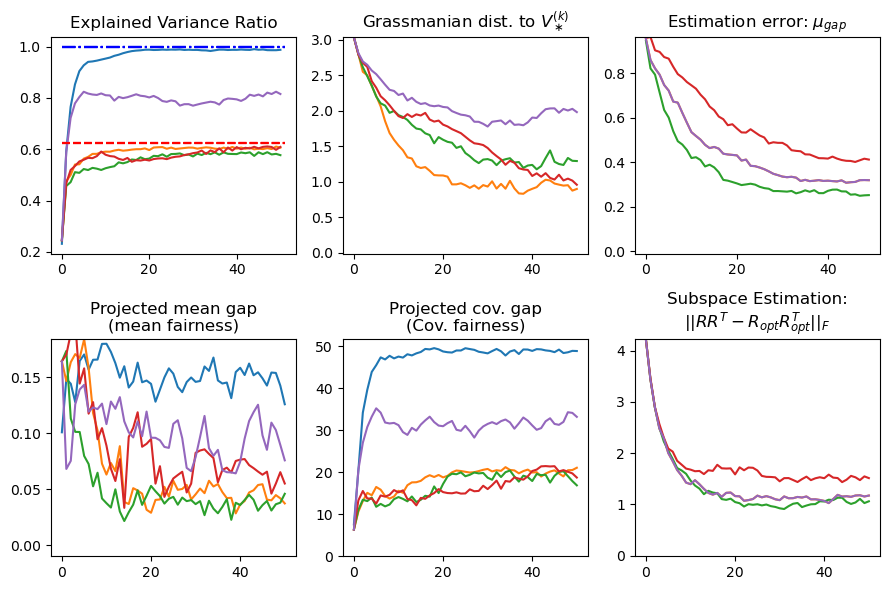

In [23]:
n_iter = 50
V = Algo.train(
    target_dim=5,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=500,
    batch_size_pca=500,
    constraint='all',
    subspace_optimization='npm',
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    fairness_tradeoff=0.3
    # lr_scheduler=lambda t: 0.998**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig